In [1]:
import random
import numpy as np
import quantecon as qe
import matplotlib.pyplot as plt

In [3]:
%%time
n = 1000000
y = 0      # Will accumulate and store sum
for i in range(n):
    x = random.uniform(0, 1)
    y += x**2

CPU times: total: 375 ms
Wall time: 471 ms


In [4]:
%%time

x = np.random.uniform(0, 1, n)
y = np.sum(x**2)

CPU times: total: 15.6 ms
Wall time: 46.6 ms


In [5]:
np.linspace(2,4,5)

array([2. , 2.5, 3. , 3.5, 4. ])

### Numpy methods

In [19]:
a = np.array([7,5,2,8,3,1])

a.sort()
print(f"sort = {a}")
print(f"sum = {a.sum()}")
print(f"mean = {a.mean()}")
print(f"max = {a.max()}")
print(f"argmax = {a.argmax()}")
print(f"cumsum = {a.cumsum()}")
print(f"cumprod = {a.cumprod()}")
print(f"var = {a.var()}")
print(f"std = {a.std()}")
print(f"transpose (T) = {a.transpose()}")
print(f"searchsorted = {a.searchsorted(5.5)}")

sort = [1 2 3 5 7 8]
sum = 26
mean = 4.333333333333333
max = 8
argmax = 5
cumsum = [ 1  3  6 11 18 26]
cumprod = [   1    2    6   30  210 1680]
var = 6.5555555555555545
std = 2.5603819159562025
transpose (T) = [1 2 3 5 7 8]
searchsorted = 4


In [21]:
a = np.array([7,5,2,8,3,1])
print(a + 10)
print(a * 10)

[17 15 12 18 13 11]
[70 50 20 80 30 10]


In [22]:
A = np.ones((2, 2))
B = np.ones((2, 2))
A @ B

array([[2., 2.],
       [2., 2.]])

In [5]:
a = np.linspace(5,25,8)
print(a)

a[a>15]

[ 5.          7.85714286 10.71428571 13.57142857 16.42857143 19.28571429
 22.14285714 25.        ]


array([16.42857143, 19.28571429, 22.14285714, 25.        ])

# Exercise 11.3

Recall our earlier discussion of the empirical cumulative distribution function.

Your task is to

- Make the `__call__` method more efficient using NumPy.
- Add a method that plots the ECDF over $[a,b]$, where $a$ and $b$ are method parameters.

In [57]:
# old implementation
import random

class ECDF:
    def __init__(self, observations):
        self.observations = observations
        return None
        
    def __call__(self, x):
        counter = 0
        for i in self.observations:
            if i <= x:
                counter += 1

        n = len(self.observations)
        ecdf = counter / n
        return ecdf       

observations = [random.uniform(0,100) for i in range(test)]

F = ECDF(observations)
print(F(90))

0.9


In [2]:
test = 100

0.92


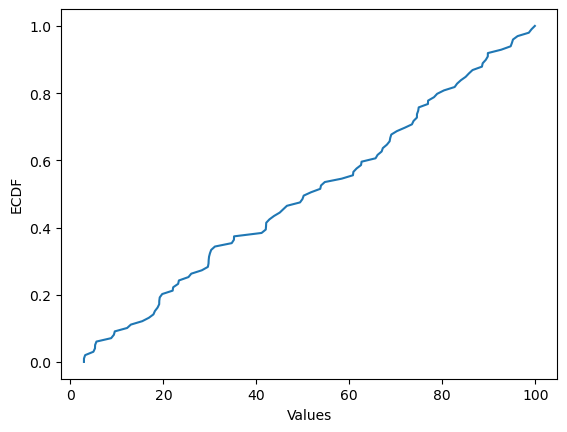

In [4]:
# new optimized model

class ECDF:
    def __init__(self, observations):
        self.observations = np.sort(np.array(observations))
        return None
        
    def __call__(self, x):
        return (self.observations.searchsorted(x)/len(self.observations))

    def plot(self, observations):
        y = np.linspace(0,len(observations),test)/test
        plt.plot(self.observations, y, label = 'ECDF')
        plt.xlabel("Values")
        plt.ylabel("ECDF")
        plt.show()
        

observations = [random.uniform(0,100) for i in range(test)]
F = ECDF(observations)
print(F(90))

F.plot(observations)